Data from: https://ucr.fbi.gov/crime-in-the-u.s/2013/crime-in-the-u.s.-2013/tables/table-8/table-8-state-cuts/table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls

FBI website crime in the US in 2013. 

In [1]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

In [2]:
# load data
crime_df = pd.read_excel("FBI_crime.xls")
#show the first 5
crime_df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861,0,0,NaN,0,0,0,12,2,10,0,0.0
1,Addison Town and Village,2577,3,0,NaN,0,0,3,24,3,20,1,0.0
2,Akron Village,2846,3,0,NaN,0,0,3,16,1,15,0,0.0
3,Albany,97956,791,8,NaN,30,227,526,4090,705,3243,142,NaN
4,Albion Village,6388,23,0,NaN,3,4,16,223,53,165,5,NaN


In [3]:
# create new df with the desired coulmns and change their name
df = crime_df[['Population', 'Murder and\nnonnegligent\nmanslaughter', 'Robbery']]
df.columns = ['Population', 'Murder', 'Robbery']

# list of the population squared
pp_sqrd = []
for pp in df.Population:
     pp_sqrd.append(pp*pp)

# add the population squared to the df and show it
df.insert(1, 'Population_sqrd', pp_sqrd, True)
df.head()

,Population,Population_sqrd,Murder,Robbery
0,1861,3463321,0,0
1,2577,6640929,0,0
2,2846,8099716,0,0
3,97956,9595377936,8,227
4,6388,40806544,0,4


In [4]:
# check how many null values exists
print("is null\n", df.isnull().sum())
print("\nis na\n", df.isna().sum())

is null
 Population         0
Population_sqrd    0
Murder             0
Robbery            0
dtype: int64

is na
 Population         0
Population_sqrd    0
Murder             0
Robbery            0
dtype: int64


In [5]:
# make murder and robbery categorical (0 or 1)
for i in range(2,4):
    for y in range(len(df)):
        if df.loc[y][i] > 0:
            df.loc[y][i] = 1
        else:
            df.loc[y][i] = 0
        
df.head()

,Population,Population_sqrd,Murder,Robbery
0,1861,3463321,0,0
1,2577,6640929,0,0
2,2846,8099716,0,0
3,97956,9595377936,1,1
4,6388,40806544,0,1


In [6]:
# add property crime in position 0 (our desired prediction)
df.insert(0, 'Property_crime', crime_df['Property\ncrime'], True)
df.head()

,Property_crime,Population,Population_sqrd,Murder,Robbery
0,12,1861,3463321,0,0
1,24,2577,6640929,0,0
2,16,2846,8099716,0,0
3,4090,97956,9595377936,1,1
4,223,6388,40806544,0,1


In [7]:
# add a few more features 
df.insert(5, 'Aggravated_assault', crime_df['Aggravated\nassault'], True)
df.insert(6, 'Burglary', crime_df['Burglary'], True)
df.insert(7, 'Larceny_theft', crime_df['Larceny-\ntheft'], True)

df.head()

,Property_crime,Population,Population_sqrd,Murder,Robbery,Aggravated_assault,Burglary,Larceny_theft
0,12,1861,3463321,0,0,0,2,10
1,24,2577,6640929,0,0,3,3,20
2,16,2846,8099716,0,0,3,1,15
3,4090,97956,9595377936,1,1,526,705,3243
4,223,6388,40806544,0,1,16,53,165


                    Property_crime  Population  Population_sqrd    Murder  \
Property_crime            1.000000    0.996265         0.991027  0.190670   
Population                0.996265    1.000000         0.998264  0.162309   
Population_sqrd           0.991027    0.998264         1.000000  0.133067   
Murder                    0.190670    0.162309         0.133067  1.000000   
Robbery                   0.079318    0.064371         0.043983  0.313271   
Aggravated_assault        0.997622    0.999134         0.997248  0.163747   
Burglary                  0.987137    0.970578         0.958563  0.240979   
Larceny_theft             0.999666    0.997946         0.993778  0.182823   

                     Robbery  Aggravated_assault  Burglary  Larceny_theft  
Property_crime      0.079318            0.997622  0.987137       0.999666  
Population          0.064371            0.999134  0.970578       0.997946  
Population_sqrd     0.043983            0.997248  0.958563       0.993778  
Mu

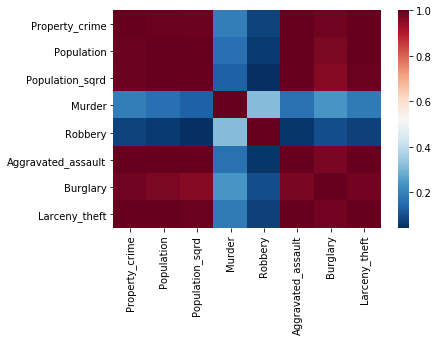

In [8]:
# check their correlation (should be minimal)
correlation = df.corr()
print(correlation)

# see in heatmap 
sns.heatmap(correlation, cmap="RdBu_r")



In [9]:
# Instantiate linear regession model
regr = linear_model.LinearRegression()

# use the model; since the new features I added are corresponding I won't add them the the linear regression 
regr.fit(df[['Population', 'Population_sqrd', 'Murder', 'Robbery']], df['Property_crime'])

# see the coefficients
print("The coefficients are\n", regr.coef_)

# the intercept
print("The intercept is\n", regr.intercept_)

# r^2 value
print('\nR-squared\n', regr.score(df[['Population', 'Population_sqrd', 'Murder', 'Robbery']], df['Property_crime']))

The coefficients are
 [ 3.46570268e-02 -2.11108019e-09  1.51866535e+01 -9.62774363e+01]
The intercept is
 -109.57533562257424

R-squared
 0.9961247104988709
